In [172]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# describe the model
def deriv(y, t, N, beta, k, delta, q):
    S, V, E, I, R = y
    dSdt = -beta * S * I / N
    dVdt = q * (S + E)
    dEdt = beta * S * I / N - k * E
    dIdt = delta * E - k * I
    dRdt = k * I
    return dSdt, dVdt, dEdt, dIdt, dRdt

In [174]:
# describe the parameters
N =  1244               # population
beta = 2.5
q = 0.01
delta = 1/5
k=1/7                   
S0, V0, E0, I0, R0 = N-1, 0, 0, 1, 0  # initial conditions: one infected, rest susceptible

In [175]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, V0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta, q))
S, V, E, I, R = ret.T

In [176]:
def plotsir(t, S, E,I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, V, 'purple', alpha=0.7, linewidth=2, label='Vaccinated')


  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show();

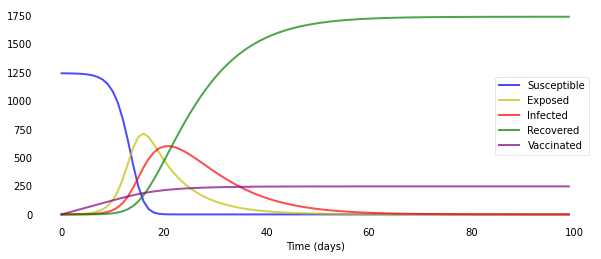

In [177]:
#plot the graph
plotsir(t, S, E, I, R)